In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data_1 = pd.read_csv('processed_data_1.txt', sep=',')
data_2 = pd.read_csv('processed_data_2.txt', sep=',')
data_3 = pd.read_csv('processed_data_3.txt', sep=',')
data = pd.concat([data_1, data_2, data_3])
data.head()

,tweet_id,timestamp,sentiment,positive_score,negative_score
0,1178791787386814465,2019-09-30,1,2,-1
1,1178791985106153472,2019-09-30,-3,1,-4
2,1178793230223183872,2019-09-30,1,2,-1
3,1178795172206919680,2019-09-30,1,2,-1
4,1178798309491822592,2019-09-30,1,2,-1


In [3]:
data.count()

tweet_id          19969563
timestamp         19969563
sentiment         19969563
positive_score    19969563
negative_score    19969563
dtype: int64

In [4]:
data['positive_score'] = pd.to_numeric(data['positive_score'])
data['negative_score'] = pd.to_numeric(data['negative_score'])
agg_data = data.groupby(['timestamp']).agg({'tweet_id':'count', 
                                            'sentiment':'mean',
                                            'positive_score':'mean',
                                            'negative_score':'mean'}).reset_index()
agg_data=agg_data.rename(columns={'timestamp': 'date', 
                                  'tweet_id': 'tweets_count',
                                  'sentiment': 'avg_sentiment',
                                  'positive_score':'avg_positive_score',
                                  'negative_score':'avg_negative_score'})
agg_data['date'] = pd.to_datetime(agg_data['date'])
agg_data.head()

,date,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
0,2019-09-30,1767,-0.032258,1.588568,-1.620826
1,2019-10-01,21080,-0.014137,1.606594,-1.620731
2,2019-10-02,18824,0.002125,1.610338,-1.608213
3,2019-10-03,20978,0.010392,1.611402,-1.601011
4,2019-10-04,21258,0.003293,1.609888,-1.606595


In [5]:
agg_data.count()

date                  459
tweets_count          459
avg_sentiment         459
avg_positive_score    459
avg_negative_score    459
dtype: int64

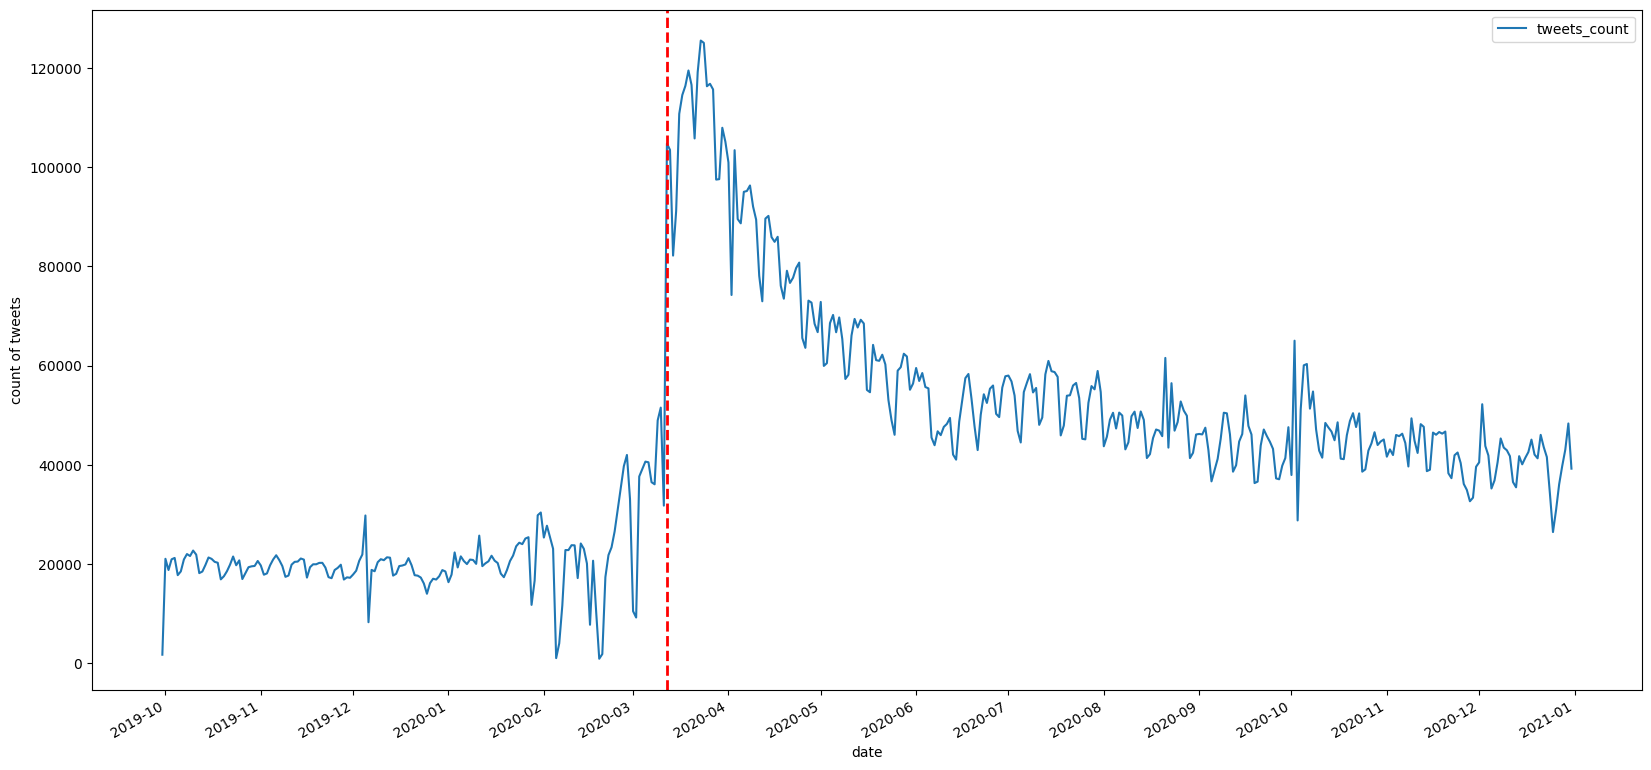

In [6]:
ax=agg_data.plot('date','tweets_count',figsize=(20, 10),x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_ylabel("count of tweets")
ax.axvline(pd.to_datetime('2020-03-12'), color='r', linestyle='--', lw=2)

Text(0, 0.5, 'average sentiment score')

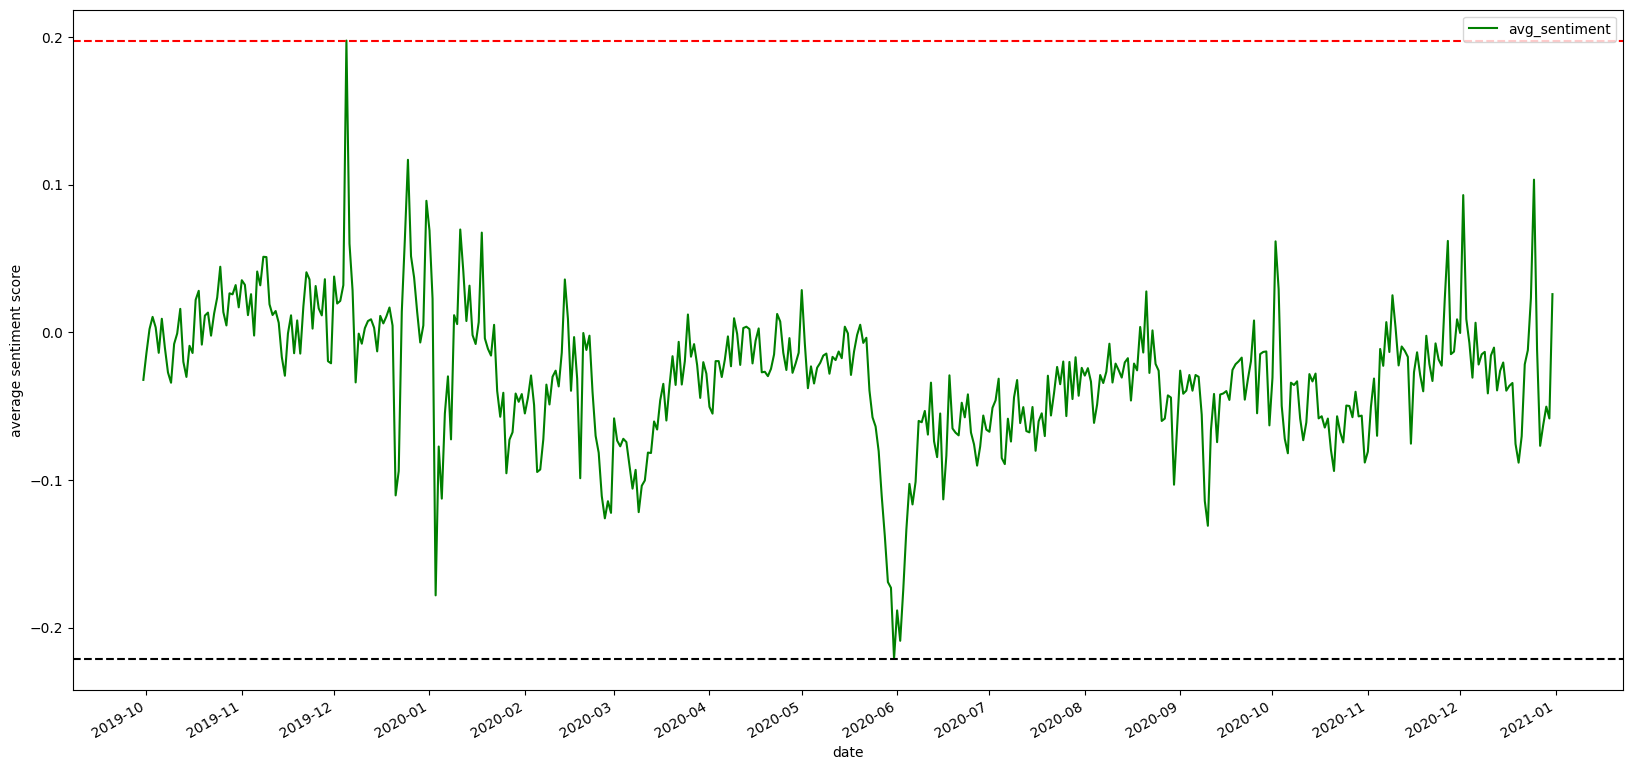

In [7]:
ax2=agg_data.plot('date','avg_sentiment',figsize=(20, 10),x_compat=True, color='g')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.axhline(y=agg_data['avg_sentiment'].min(), color='black', linestyle='--')
ax2.axhline(y=agg_data['avg_sentiment'].max(), color='r', linestyle='--')
ax2.set_ylabel("average sentiment score")

In [8]:
agg_data['avg_sentiment'].min()

-0.22105935360272466

In [13]:
a = agg_data[agg_data['avg_sentiment'] == agg_data['avg_sentiment'].min()]
a.head()

,date,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
244,2020-05-31,56374,-0.221059,1.586653,-1.807713


In [9]:
agg_data['avg_sentiment'].max()

0.19746376811594202

In [14]:
a = agg_data[agg_data['avg_sentiment'] == agg_data['avg_sentiment'].max()]
a.head()

,date,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
66,2019-12-05,29808,0.197464,1.676228,-1.478764


Text(0, 0.5, 'average positive score')

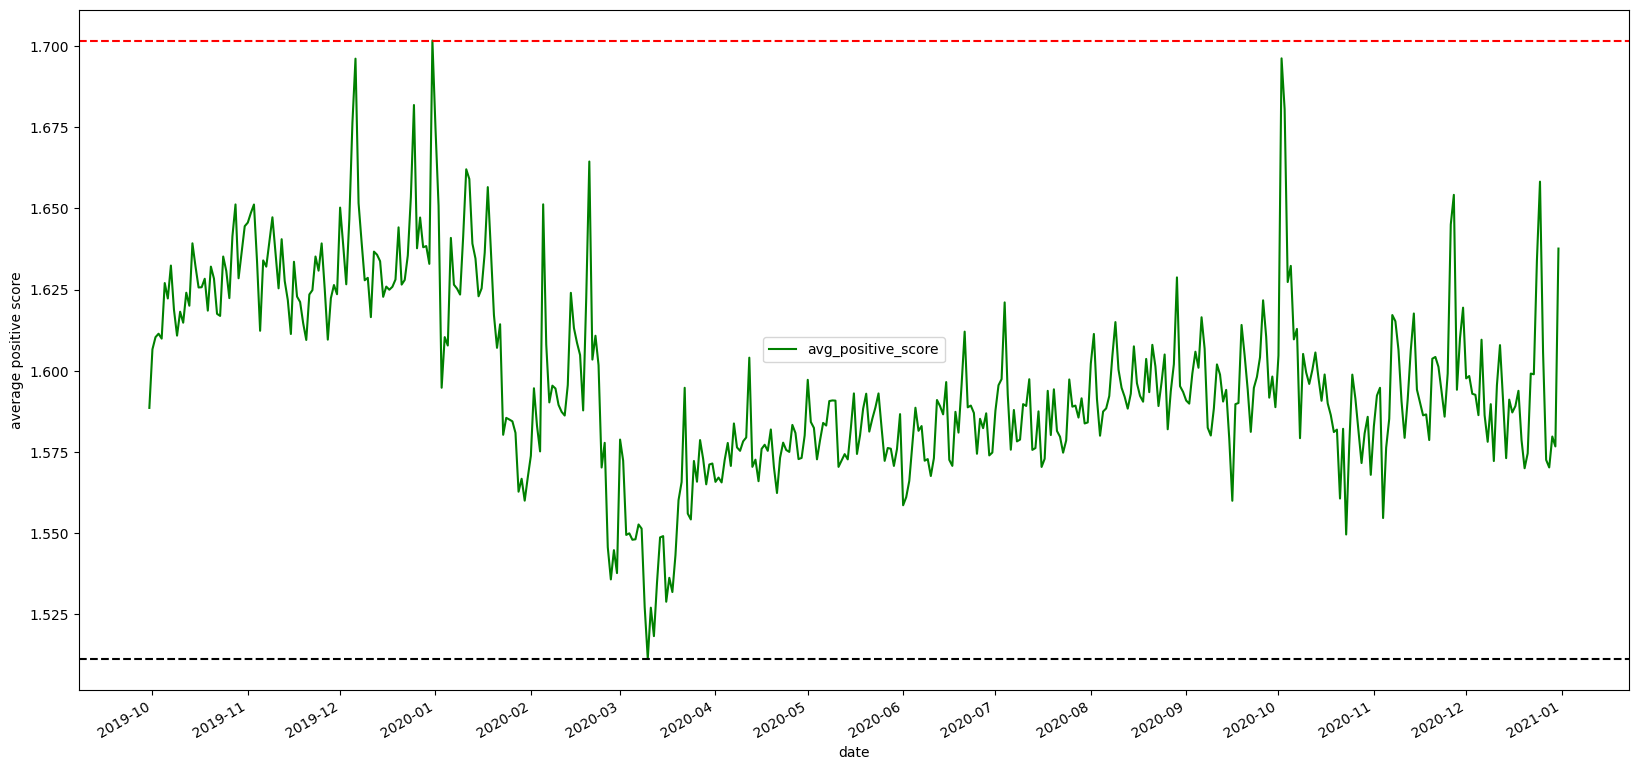

In [15]:
ax3=agg_data.plot('date','avg_positive_score',figsize=(20, 10),x_compat=True, color='g')
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.axhline(y=agg_data['avg_positive_score'].min(), color='black', linestyle='--')
ax3.axhline(y=agg_data['avg_positive_score'].max(), color='r', linestyle='--')
ax3.set_ylabel("average positive score")

Text(0, 0.5, 'average negative score')

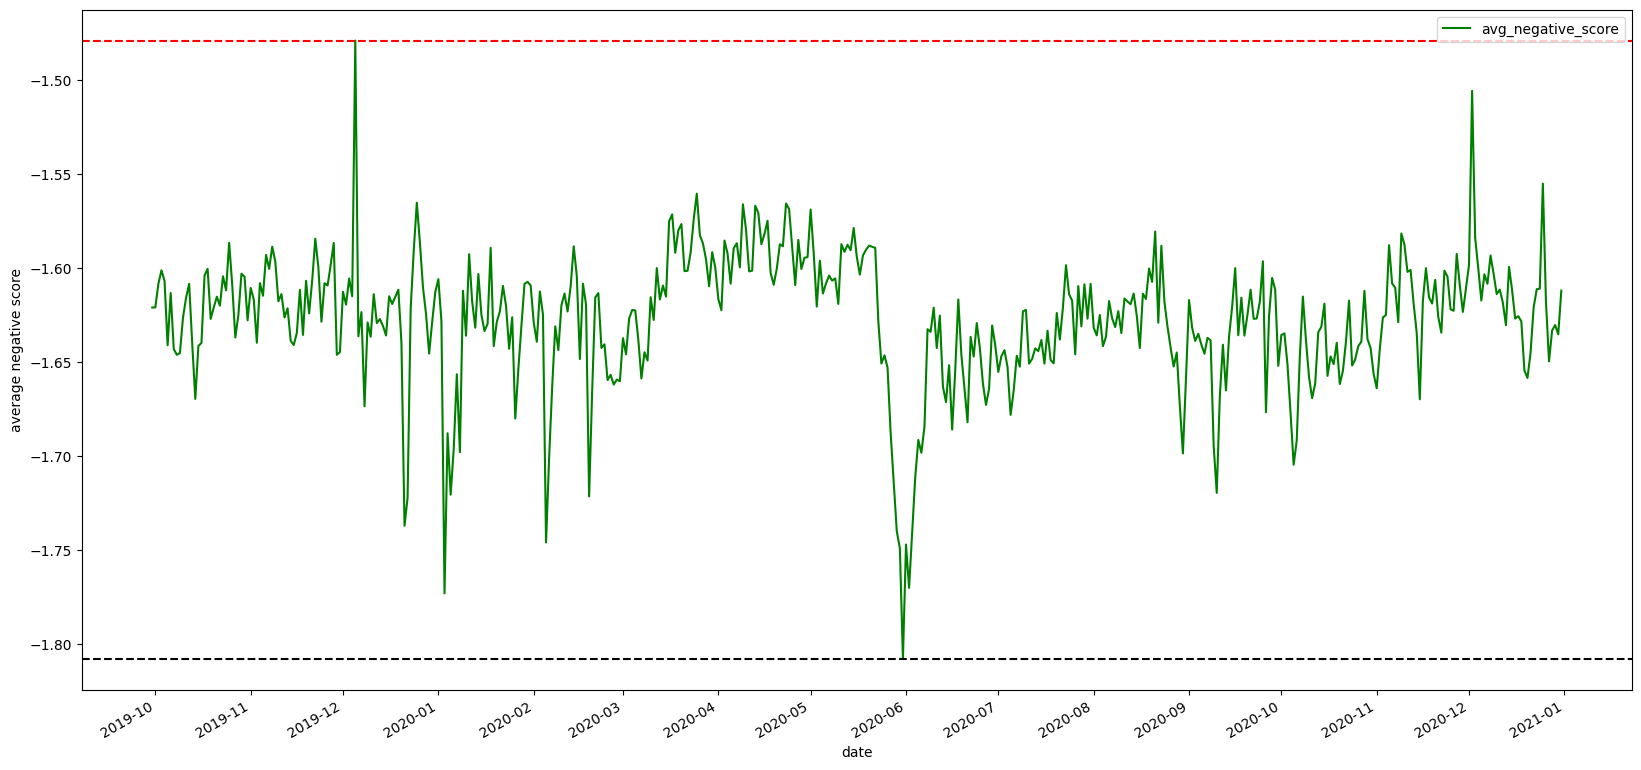

In [49]:
ax4=agg_data.plot('date','avg_negative_score',figsize=(20, 10),x_compat=True, color='g')
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.axhline(y=agg_data['avg_negative_score'].min(), color='black', linestyle='--')
ax4.axhline(y=agg_data['avg_negative_score'].max(), color='r', linestyle='--')
ax4.set_ylabel("average negative score")

In [17]:
a = agg_data[agg_data['avg_positive_score'] == agg_data['avg_positive_score'].min()]
a.head()

,date,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
162,2020-03-10,51529,-0.103941,1.511382,-1.615323


In [19]:
before_03 = agg_data[agg_data['date']<'2020-03-01']
after_03 = agg_data[agg_data['date']>='2020-03-01']

In [51]:
before_03.describe()

,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
count,153.000000,153.000000,153.000000,153.000000
mean,19901.098039,-0.006992,1.620871,-1.627863
std,5505.139825,0.048352,0.027734,0.033921
min,951.000000,-0.178140,1.535792,-1.772910
25%,17897.000000,-0.030242,1.609572,-1.639673
50%,19977.000000,0.002125,1.625269,-1.622849
75%,21382.000000,0.017218,1.636415,-1.609080
max,41992.000000,0.197464,1.701597,-1.478764


In [52]:
after_03.describe()

,tweets_count,avg_sentiment,avg_positive_score,avg_negative_score
count,306.000000,306.000000,306.000000,306.000000
mean,55309.460784,-0.040661,1.585952,-1.626614
std,19929.966469,0.039713,0.021130,0.035601
min,9255.000000,-0.221059,1.511382,-1.807713
25%,43120.500000,-0.060367,1.575109,-1.644732
50%,48661.000000,-0.034151,1.586470,-1.623427
75%,59379.250000,-0.017791,1.595456,-1.603041
max,125458.000000,0.103295,1.696124,-1.505525


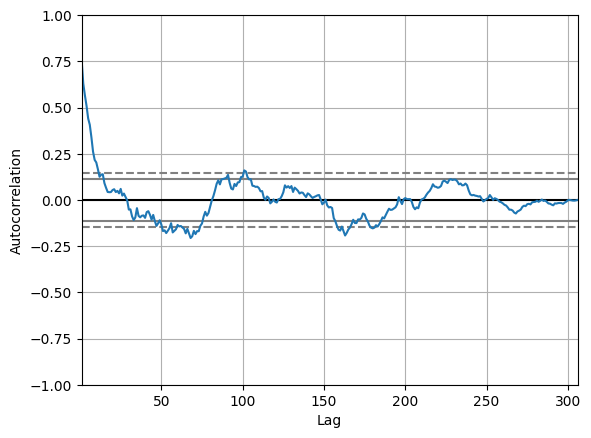

In [91]:
autocorrelation_plot(after_03['avg_sentiment'])
plt.show()

In [23]:
model = ARIMA(after_03['avg_sentiment'], order=(3,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          avg_sentiment   No. Observations:                  306
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 678.959
Date:                Sat, 29 Oct 2022   AIC                          -1349.918
Time:                        12:54:55   BIC                          -1335.037
Sample:                             0   HQIC                         -1343.966
                                - 306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3005      0.042     -7.148      0.000      -0.383      -0.218
ar.L2         -0.2298      0.047     -4.921      0.000      -0.321      -0.138
ar.L3         -0.1069      0.054     -1.982      0.0

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


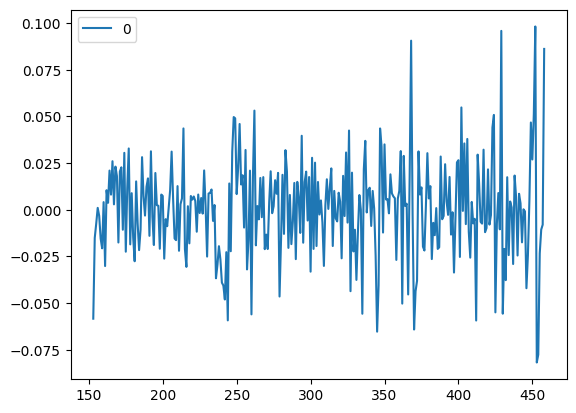

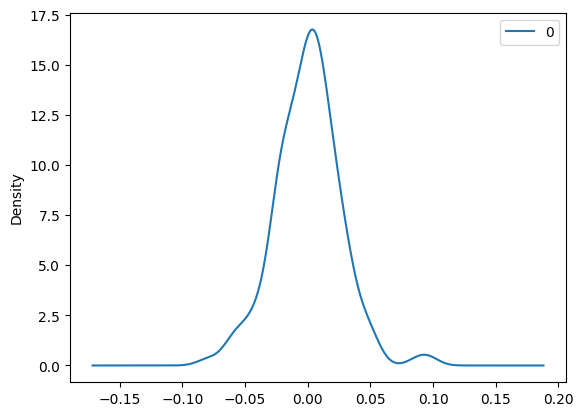

                0
count  306.000000
mean     0.000094
std      0.026327
min     -0.081756
25%     -0.017159
50%      0.001664
75%      0.015669
max      0.098136


In [24]:
# plot residual error
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())